In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *

In [2]:
# inspect functions
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))

In [3]:
# How to initialize
# Class check
#CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

#初期値を設定
PSO.set_initial_input_values({"number_demand": 10,
                              "pv_capacity_per_unit": 245,
                              "SOC_max[%]": 0.9,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })
#初期値を設定
PSO.set_initial_cost_parameters({'PV_cost[yen/kWh]': 40,
                                 'battery_cost[yen/kWh]': 100,
                                 'diesel_cost[yen/kWh]': 140})

# PSOの中身を確認
# print(dir(PSO))
#print(vars(PSO))

In [4]:
%%time
"""
#ここからForで回すような感じで設備容量の最適解を探していく。
#つまり、これが粒子となる。
PSO.update_fitness_variable_parameters(
    {'pv_cap_max': 4000, 'battery_cap_max': 3, 'diesel_max': 2})

#毎回、容量が変わるのでバッテリーのリミットを更新
PSO.set_battery_limit()
"""
iterations_PSO(PSO)

#フローチャートをループで回して計算結果を取得
#df, total_check, variables, total_cost ,success_loops, failed_loops = loop_flowchart(PSO)

Inform the number of iterations: 50
Inform the number of particles: 15
Inform w: 0.1
Inform c1: 0.05
Inform c2: 0.02
{'pv_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 50 n_particles: 15 w: 0.1 c1: 0.05 c2: 0.02 particle: {'particle_position_vector': array([[4.42303586e+05, 9.10885271e+01, 6.48969398e+01],
       [2.34789275e+05, 9.21839479e+01, 5.30910021e+01],
       [1.59715107e+04, 2.49176806e+01, 3.11875923e+00],
       [1.06365687e+05, 9.85300773e+01, 7.65610594e+01],
       [4.77055691e+05, 8.33728525e+01, 8.33027195e+01],
       [4.89273653e+05, 1.96206362e+01, 7.49616106e+01],
       [3.73243053e+05, 1.90577370e+01, 5.90909185e+01],
       [1.92057168e+05, 9.03483027e+01, 5.68629129e+01],
       [4.84153265e+05, 1.39020731e+01, 8.20138856e+01],
       [4.40203656e+05, 7.70437635e+00, 9.19888949e+01],
       [1.22602706e+05, 9.64826938e+01, 7.34466838e+01],
       [3.38431510e+05, 4.36561645e+01, 2.15238011e+01],
       [4.01116851e+05, 2.12820822e+00, 7.8128

    particle_position[ 10 ]  33175.7467394158 particle_vector[ 10 ]  [1.22203819e+05 9.60972377e+01 7.30267027e+01]
    particle_position[ 11 ]  64858.10444254549 particle_vector[ 11 ]  [3.36624665e+05 4.36487167e+01 2.14782046e+01]
    particle_position[ 12 ]  73191.70077236113 particle_vector[ 12 ]  [3.99614942e+05 2.30972828e+00 7.78436764e+01]
    particle_position[ 13 ]  72250.0620663528 particle_vector[ 13 ]  [3.81139009e+05 7.21278425e+01 6.49467956e+01]
    particle_position[ 14 ]  66150.35773479109 particle_vector[ 14 ]  [3.38855650e+05 8.94573964e+01 8.35434222e+01]
-------iteration = 2 -----------
    particle_position[ 0 ]  81879.40330284766 particle_vector[ 0 ]  [4.40524623e+05 9.08445344e+01 6.46566281e+01]
    particle_position[ 1 ]  49769.62924631426 particle_vector[ 1 ]  [2.32004469e+05 9.13339622e+01 5.24548646e+01]
    particle_position[ 2 ]  24619.729413903668 particle_vector[ 2 ]  [6.73838586e+04 4.29231032e+01 1.48018334e+01]
    particle_position[ 3 ]  30861.1194

    particle_position[ 6 ]  67382.85211957643 particle_vector[ 6 ]  [3.57978782e+05 2.02471515e+01 5.68804493e+01]
    particle_position[ 7 ]  42403.773473031746 particle_vector[ 7 ]  [1.84330344e+05 8.74082860e+01 5.42564626e+01]
    particle_position[ 8 ]  81849.49348670307 particle_vector[ 8 ]  [4.53222631e+05 1.60504996e+01 7.70252839e+01]
    particle_position[ 9 ]  76119.83690141531 particle_vector[ 9 ]  [4.17134518e+05 9.88396601e+00 8.72127622e+01]
    particle_position[ 10 ]  32663.593054323526 particle_vector[ 10 ]  [1.18905191e+05 9.28968547e+01 6.95212024e+01]
    particle_position[ 11 ]  62786.08797722295 particle_vector[ 11 ]  [3.23116004e+05 4.36133613e+01 2.11435528e+01]
    particle_position[ 12 ]  71083.50924488717 particle_vector[ 12 ]  [3.85502470e+05 4.03654366e+00 7.51658575e+01]
    particle_position[ 13 ]  69695.18457268544 particle_vector[ 13 ]  [3.64608160e+05 7.05905609e+01 6.23049604e+01]
    particle_position[ 14 ]  64287.51316544701 particle_vector[ 14 ]  

    particle_position[ 2 ]  24630.23645034352 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  30303.90538197539 particle_vector[ 3 ]  [1.01752253e+05 9.19488409e+01 6.92515360e+01]
    particle_position[ 4 ]  78491.49994022901 particle_vector[ 4 ]  [4.21302625e+05 7.78667589e+01 7.39801782e+01]
    particle_position[ 5 ]  79263.51266397003 particle_vector[ 5 ]  [4.34982333e+05 2.26213363e+01 6.72201107e+01]
    particle_position[ 6 ]  64621.144168230545 particle_vector[ 6 ]  [3.39664848e+05 2.16792803e+01 5.42288803e+01]
    particle_position[ 7 ]  41185.17169986735 particle_vector[ 7 ]  [1.76687107e+05 8.45020128e+01 5.16773187e+01]
    particle_position[ 8 ]  79116.89880894103 particle_vector[ 8 ]  [4.35134109e+05 1.73125500e+01 7.41083687e+01]
    particle_position[ 9 ]  72885.10124200929 particle_vector[ 9 ]  [3.95608813e+05 1.19204252e+01 8.27562218e+01]
    particle_position[ 10 ]  32211.905754288007 particle_vector[ 10 ]  [1.15996

    particle_position[ 13 ]  65112.42640016368 particle_vector[ 13 ]  [3.34956190e+05 6.78340348e+01 5.75663116e+01]
    particle_position[ 14 ]  60074.32984526777 particle_vector[ 14 ]  [3.00351296e+05 8.28608142e+01 7.37931583e+01]
-------iteration = 16 -----------
    particle_position[ 0 ]  74035.99166827645 particle_vector[ 0 ]  [3.91434096e+05 8.45441886e+01 5.80984273e+01]
    particle_position[ 1 ]  46077.99341423485 particle_vector[ 1 ]  [2.08675210e+05 8.44763296e+01 4.71187767e+01]
    particle_position[ 2 ]  24630.236450354027 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  29957.20567897765 particle_vector[ 3 ]  [9.95544116e+04 8.88102575e+01 6.57636071e+01]
    particle_position[ 4 ]  76030.9625661832 particle_vector[ 4 ]  [4.05392050e+05 7.62974838e+01 7.13199485e+01]
    particle_position[ 5 ]  77874.20833533684 particle_vector[ 5 ]  [4.25813774e+05 2.31288632e+01 6.59128353e+01]
    particle_position[ 6 ]  62259.52275039

    particle_position[ 8 ]  73092.45354324835 particle_vector[ 8 ]  [3.95255048e+05 2.00949436e+01 6.76775591e+01]
    particle_position[ 9 ]  66602.7861523528 particle_vector[ 9 ]  [3.53802843e+05 1.58755176e+01 7.41009887e+01]
    particle_position[ 10 ]  31370.66587025522 particle_vector[ 10 ]  [1.10578000e+05 8.48161588e+01 6.06679299e+01]
    particle_position[ 11 ]  55772.49887063979 particle_vector[ 11 ]  [2.77389589e+05 4.34975911e+01 2.00119669e+01]
    particle_position[ 12 ]  65033.127138886746 particle_vector[ 12 ]  [3.45000191e+05 8.99403080e+00 6.74806773e+01]
    particle_position[ 13 ]  63937.44489491918 particle_vector[ 13 ]  [3.27353668e+05 6.71272842e+01 5.63513610e+01]
    particle_position[ 14 ]  57894.35730440632 particle_vector[ 14 ]  [2.86366644e+05 8.04653047e+01 7.02518702e+01]
-------iteration = 21 -----------
    particle_position[ 0 ]  71803.7914648326 particle_vector[ 0 ]  [3.77046994e+05 8.26978293e+01 5.61764136e+01]
    particle_position[ 1 ]  44922.347

    particle_position[ 4 ]  70361.90146822429 particle_vector[ 4 ]  [3.68734194e+05 7.26818849e+01 6.51907977e+01]
    particle_position[ 5 ]  74340.02588369703 particle_vector[ 5 ]  [4.02490329e+05 2.44199359e+01 6.25873223e+01]
    particle_position[ 6 ]  59319.28246749143 particle_vector[ 6 ]  [3.04506190e+05 2.44286473e+01 4.91384608e+01]
    particle_position[ 7 ]  39082.2443685473 particle_vector[ 7 ]  [1.63497259e+05 7.94866899e+01 4.72265192e+01]
    particle_position[ 8 ]  70218.10281832064 particle_vector[ 8 ]  [3.76228166e+05 2.14224642e+01 6.46093261e+01]
    particle_position[ 9 ]  64515.245491464855 particle_vector[ 9 ]  [3.39911203e+05 1.71897491e+01 7.12249548e+01]
    particle_position[ 10 ]  31117.559370935396 particle_vector[ 10 ]  [1.08947850e+05 8.32342625e+01 5.89347922e+01]
    particle_position[ 11 ]  53172.61498600839 particle_vector[ 11 ]  [2.60439157e+05 4.34546760e+01 1.95924966e+01]
    particle_position[ 12 ]  62463.64205445668 particle_vector[ 12 ]  [3.27

    particle_position[ 14 ]  54865.59346535315 particle_vector[ 14 ]  [2.66936946e+05 7.71370828e+01 6.53317508e+01]
-------iteration = 30 -----------
    particle_position[ 0 ]  67534.68554084268 particle_vector[ 0 ]  [3.49531514e+05 7.91666481e+01 5.25005428e+01]
    particle_position[ 1 ]  43417.01215761018 particle_vector[ 1 ]  [1.91830150e+05 7.95250228e+01 4.32658079e+01]
    particle_position[ 2 ]  24630.236450354027 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  29116.378436664054 particle_vector[ 3 ]  [9.42241358e+04 8.11984645e+01 5.73045699e+01]
    particle_position[ 4 ]  65892.74550128893 particle_vector[ 4 ]  [3.39835286e+05 6.98315583e+01 6.03589339e+01]
    particle_position[ 5 ]  72253.1899903584 particle_vector[ 5 ]  [3.88718488e+05 2.51822781e+01 6.06236999e+01]
    particle_position[ 6 ]  57105.41523953145 particle_vector[ 6 ]  [2.89825196e+05 2.55766843e+01 4.70128843e+01]
    particle_position[ 7 ]  38031.756062814

    particle_position[ 10 ]  30580.933017028103 particle_vector[ 10 ]  [1.05378944e+05 7.97710006e+01 5.51404158e+01]
    particle_position[ 11 ]  50716.02082119394 particle_vector[ 11 ]  [2.44422928e+05 4.34141261e+01 1.91961450e+01]
    particle_position[ 12 ]  59376.938022955736 particle_vector[ 12 ]  [3.07136705e+05 1.36285290e+01 6.02962000e+01]
    particle_position[ 13 ]  59937.74303491547 particle_vector[ 13 ]  [3.01474267e+05 6.47214661e+01 5.22156022e+01]
    particle_position[ 14 ]  53701.83691694868 particle_vector[ 14 ]  [2.59471380e+05 7.58582640e+01 6.34412696e+01]
-------iteration = 35 -----------
    particle_position[ 0 ]  65545.25417205226 particle_vector[ 0 ]  [3.36709119e+05 7.75210945e+01 5.07875628e+01]
    particle_position[ 1 ]  42041.71472383076 particle_vector[ 1 ]  [1.83123974e+05 7.69659971e+01 4.12744454e+01]
    particle_position[ 2 ]  24630.236450354027 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  28826

    particle_position[ 6 ]  53407.781396799546 particle_vector[ 6 ]  [2.65304783e+05 2.74941528e+01 4.34627148e+01]
    particle_position[ 7 ]  36669.146781189025 particle_vector[ 7 ]  [1.48361980e+05 7.37316343e+01 4.21192512e+01]
    particle_position[ 8 ]  62660.650390847884 particle_vector[ 8 ]  [3.26201302e+05 2.49128780e+01 5.65421041e+01]
    particle_position[ 9 ]  58744.95492058496 particle_vector[ 9 ]  [3.01512525e+05 2.08224915e+01 6.32751451e+01]
    particle_position[ 10 ]  30281.893736760092 particle_vector[ 10 ]  [1.03384894e+05 7.78359772e+01 5.30203893e+01]
    particle_position[ 11 ]  49007.35260744138 particle_vector[ 11 ]  [2.33282944e+05 4.33859219e+01 1.89204651e+01]
    particle_position[ 12 ]  57446.79400055036 particle_vector[ 12 ]  [2.94215995e+05 1.52100265e+01 5.78445359e+01]
    particle_position[ 13 ]  58228.82066103115 particle_vector[ 13 ]  [2.90416970e+05 6.36935504e+01 5.04485478e+01]
    particle_position[ 14 ]  52577.119149571125 particle_vector[ 14 

    particle_position[ 1 ]  40107.888018200116 particle_vector[ 1 ]  [1.70882089e+05 7.33677119e+01 3.84743603e+01]
    particle_position[ 2 ]  24630.236450354027 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  28493.601453416362 particle_vector[ 3 ]  [9.02761512e+04 7.55606245e+01 5.10392001e+01]
    particle_position[ 4 ]  59258.83215673813 particle_vector[ 4 ]  [2.96938405e+05 6.56005984e+01 5.31866254e+01]
    particle_position[ 5 ]  65250.60194541613 particle_vector[ 5 ]  [3.42505687e+05 2.77403945e+01 5.40345671e+01]
    particle_position[ 6 ]  51105.314821464955 particle_vector[ 6 ]  [2.50036253e+05 2.86881344e+01 4.12520723e+01]
    particle_position[ 7 ]  36070.375110612564 particle_vector[ 7 ]  [1.44606402e+05 7.23036090e+01 4.08519641e+01]
    particle_position[ 8 ]  60607.26253259168 particle_vector[ 8 ]  [3.12608818e+05 2.58612364e+01 5.43502100e+01]
    particle_position[ 9 ]  57236.44563840216 particle_vector[ 9 ]  [2.9147

    particle_position[ 13 ]  55357.20069479494 particle_vector[ 13 ]  [2.71836634e+05 6.19662729e+01 4.74792446e+01]
    particle_position[ 14 ]  49622.23932126579 particle_vector[ 14 ]  [2.33300522e+05 7.13753109e+01 5.68141081e+01]
-------iteration = 49 -----------
    particle_position[ 0 ]  59440.769034714984 particle_vector[ 0 ]  [2.97364150e+05 7.24717836e+01 4.55313570e+01]
    particle_position[ 1 ]  39522.465527852466 particle_vector[ 1 ]  [1.67176133e+05 7.22784121e+01 3.76266976e+01]
    particle_position[ 2 ]  24630.236450354027 particle_vector[ 2 ]  [6.74513099e+04 4.29660693e+01 1.48166501e+01]
    particle_position[ 3 ]  28363.112768693685 particle_vector[ 3 ]  [8.94489412e+04 7.43793440e+01 4.97264351e+01]
    particle_position[ 4 ]  57807.361011315326 particle_vector[ 4 ]  [2.87552756e+05 6.46748829e+01 5.16173557e+01]
    particle_position[ 5 ]  62040.791330021224 particle_vector[ 5 ]  [3.21322898e+05 2.89129708e+01 5.10142740e+01]
    particle_position[ 6 ]  50103.88

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df

,Check,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv-demand,trashed power
0,True,50.000000,17.401258,0.000000,0.000000,0.00,0.000000,0h: discharging 0.0[kWh].,0,0.000000,0.000000,0.000000
0,True,41.724736,14.521258,0.000000,2.880000,2.88,0.000000,1h: discharging 2.88[kWh].,1,0.000000,-2.880000,0.000000
0,True,33.449473,11.641258,0.000000,2.880000,2.88,0.000000,2h: discharging 2.88[kWh].,2,0.000000,-2.880000,0.000000
0,True,25.174209,8.761258,0.000000,2.880000,2.88,0.000000,3h: discharging 2.88[kWh].,3,0.000000,-2.880000,0.000000
0,True,22.222222,7.733892,0.000000,1.027366,2.88,1.852634,"4h: discharging 1.027[kWh], diesel 1.853[kWh].",4,0.000000,-2.880000,0.000000
0,True,22.222222,7.733892,0.000000,0.000000,2.88,2.546769,"5h: discharging 0.0[kWh], diesel 2.547[kWh].",5,0.333231,-2.546769,0.000000
0,True,22.222222,7.733892,0.000000,0.000000,2.88,1.271317,"6h: discharging 0.0[kWh], diesel 1.271[kWh].",6,1.608683,-1.271317,0.000000
0,True,29.129014,10.137630,2.403737,0.000000,3.74,0.000000,7h: Battery charge without diesel.,7,6.143737,2.403737,0.000000
0,True,29.055235,10.111953,0.000000,0.025677,13.31,0.000000,8h: discharging 0.026[kWh].,8,13.284323,-0.025677,0.000000
0,True,54.596023,19.000790,8.888837,0.000000,12.74,0.000000,9h: Battery charge without diesel.,9,21.628837,8.888837,0.000000


In [6]:
best_cost_list=np.array(PSO.best_cost_list)
gbest_list=np.array(PSO.gbest_list)
iteration_list=np.array(PSO.iteration_list)
plot_list = pd.DataFrame({ 'iteration' : np.array(PSO.iteration_list),
                           'cost' :np.array(PSO.best_cost_list)})
print(max(best_cost_list), min(best_cost_list))
#plot_list


23584.668184292797 23584.668184292797


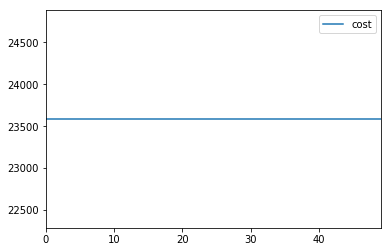

In [7]:
plot_list.plot(y="cost")